In [403]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
# importing RBF kernel + grid search
from sklearn.gaussian_process.kernels import RBF, DotProduct, WhiteKernel, Matern
from sklearn.model_selection import GridSearchCV

# load the heart disease prediction dataset
heart_dataframe = pd.read_csv("/content/Heart_Disease_Prediction.csv")
heart_dataframe.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [404]:
# check dataset shape
heart_dataframe.shape

(270, 14)

In [405]:
# check column names
heart_dataframe.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [406]:
# check data type information
heart_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [407]:
# statistical description
heart_dataframe.describe(include='all')

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Absence
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,NaN
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,NaN
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,NaN
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,NaN
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,NaN


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')


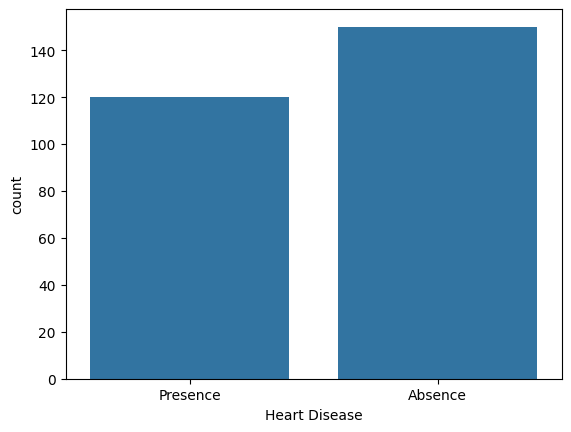

In [408]:
# visualizing target column
# check the actual column names in dataframe
print(heart_dataframe.columns)

# assuming the target column is named 'Heart Disease', replace 'Class' with 'Heart Disease'
ax = sns.countplot(x="Heart Disease", data=heart_dataframe)

# if the target column has a different name, replace 'Heart Disease' with the actual column name

In [409]:
# check target column distribution
# replace 'Class' with the actual target column name from your dataset, e.g., 'Heart Disease'
heart_dataframe['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


In [410]:
# computing covariance/correlation matrix
from pandas import DataFrame
# select only numerical columns for covariance calculation
numerical_cols = heart_dataframe.select_dtypes(include=np.number).columns
heart_data = heart_dataframe[numerical_cols].values
heart_df = DataFrame(heart_data)
cov = heart_df.cov()
corr = heart_df.corr()

cmap = sns.diverging_palette(250, 5, as_cmap=True)
# apply background gradient and set properties
styled_corr = corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})

# format the display precision to 2 decimal places
# this uses the 'format' method which is available in older pandas versions
styled_corr.format(precision=2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.00,-0.09,0.10,0.27,0.22,0.12,0.13,-0.40,0.10,0.19,0.16,0.36,0.11
1,-0.09,1.00,0.03,-0.06,-0.20,0.04,0.04,-0.08,0.18,0.10,0.05,0.09,0.39
2,0.10,0.03,1.00,-0.04,0.09,-0.10,0.07,-0.32,0.35,0.17,0.14,0.23,0.26
3,0.27,-0.06,-0.04,1.00,0.17,0.16,0.12,-0.04,0.08,0.22,0.14,0.09,0.13
4,0.22,-0.20,0.09,0.17,1.00,0.03,0.17,-0.02,0.08,0.03,-0.01,0.13,0.03
5,0.12,0.04,-0.10,0.16,0.03,1.00,0.05,0.02,-0.00,-0.03,0.04,0.12,0.05
6,0.13,0.04,0.07,0.12,0.17,0.05,1.00,-0.07,0.10,0.12,0.16,0.11,0.01
7,-0.40,-0.08,-0.32,-0.04,-0.02,0.02,-0.07,1.00,-0.38,-0.35,-0.39,-0.27,-0.25
8,0.10,0.18,0.35,0.08,0.08,-0.00,0.10,-0.38,1.00,0.27,0.26,0.15,0.32
9,0.19,0.10,0.17,0.22,0.03,-0.03,0.12,-0.35,0.27,1.00,0.61,0.26,0.32


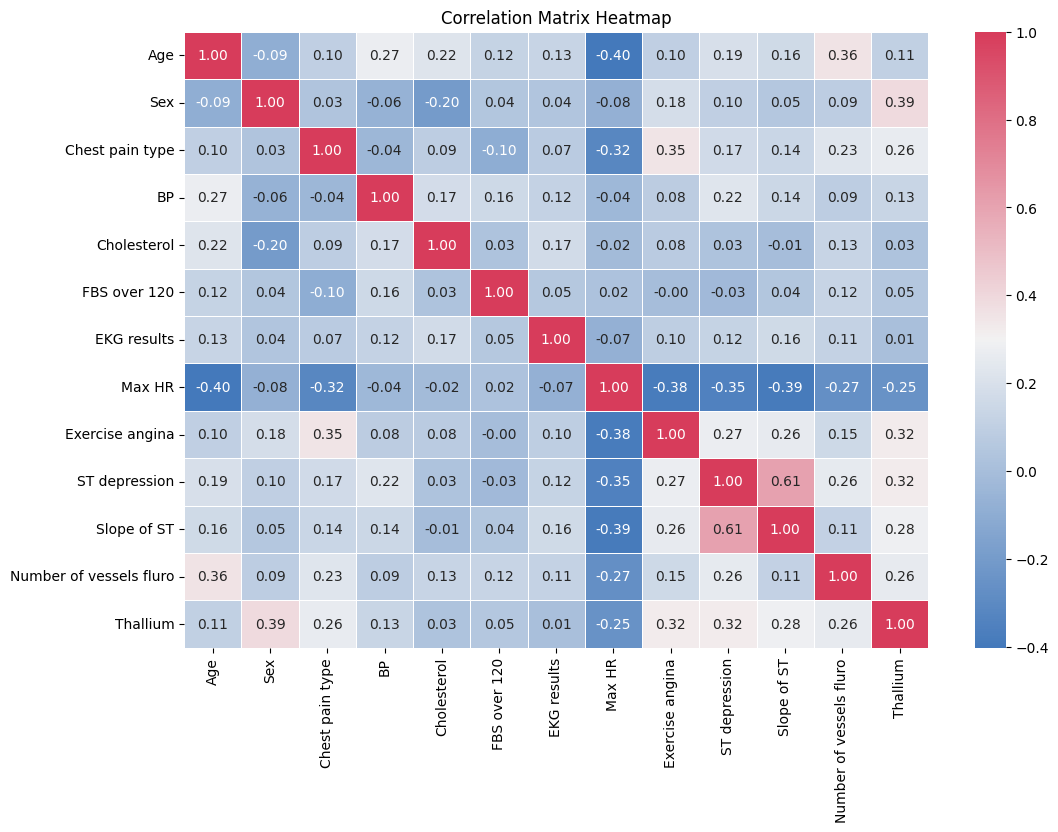

In [411]:
# selecting numerical columns
numerical_columns = heart_dataframe.select_dtypes(include=['number']).columns
numerical_data = heart_dataframe[numerical_columns]

# computing correlation matrix
corr_matrix = numerical_data.corr()

# plotting heatmap
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(250, 5, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

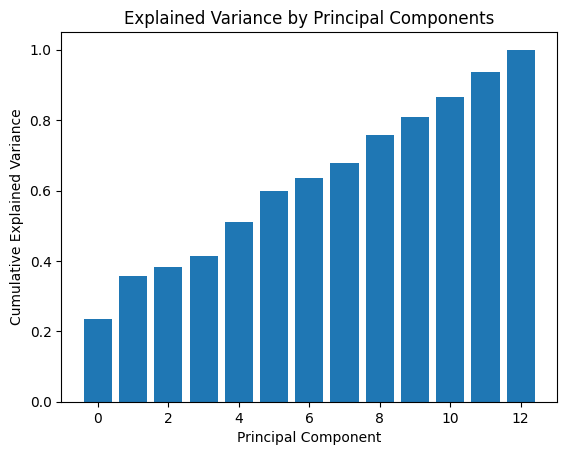

In [412]:
# PCA: eigen decomposition
w, v = np.linalg.eig(corr)
# Change np.arange(54) to np.arange(len(w)) to match the number of eigenvalues
plt.bar(np.arange(len(w)), np.cumsum(w) / np.sum(w))
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.show()

In [413]:
# extracting the target column "Class" and removing it from the original DataFrame
# Replace 'Class' with the actual target column name, which is 'Heart Disease'
y_heart_data = heart_dataframe.pop('Heart Disease')
X_heart_data = heart_dataframe

In [414]:
# splitting training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_heart_data, y_heart_data, test_size=0.33)

In [415]:
# kernels and combinations used
kernel_options = [
    1.0 * RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-7, 1e5)),
    1.0 * Matern(length_scale=1.0, nu=1.5) + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-7, 1e5)),
    1.0 * DotProduct() + WhiteKernel(noise_level=1.0, noise_level_bounds=(1e-7, 1e5))
]

param_grid = {
    "kernel": kernel_options,
    "max_iter_predict": [50, 100]  # number of iterations
}

gpc = GaussianProcessClassifier()
grid_search_gpc = GridSearchCV(
    estimator=gpc,
    param_grid=param_grid,
    cv=3,                 # three-fold cross-validation
    scoring='accuracy',   # searching for the optimal model based on accuracy
    n_jobs=-1             # parallel execution
)

grid_search_gpc.fit(X_train, y_train)
best_gpc = grid_search_gpc.best_estimator_
print("optimal parameters for GPC:", grid_search_gpc.best_params_)
print("GPC score on the training set:", best_gpc.score(X_train, y_train))
print("GPC score on the test set:", best_gpc.score(X_test, y_test))

optimal parameters for GPC: {'kernel': 1**2 * DotProduct(sigma_0=1) + WhiteKernel(noise_level=1), 'max_iter_predict': 50}
GPC score on the training set: 0.8555555555555555
GPC score on the test set: 0.8


In [416]:
# classification prediction
pred_GPC = best_gpc.predict(X_test) # Changed Cls1 to best_gpc
pred_GPC

array(['Absence', 'Presence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Presence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Presence', 'Absen

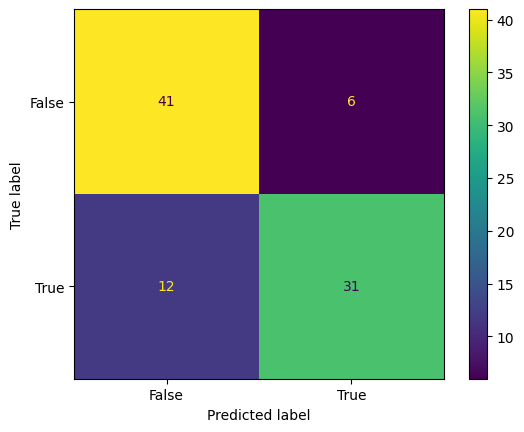

In [417]:
# confusion matrix (classification)
confusion_matrix1 = metrics.confusion_matrix(y_test, pred_GPC)
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1,
                                             display_labels = [False, True])
cm_display1.plot()
plt.show()

In [418]:
# classification report
print(classification_report(y_test, pred_GPC))

              precision    recall  f1-score   support

     Absence       0.77      0.87      0.82        47
    Presence       0.84      0.72      0.78        43

    accuracy                           0.80        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



In [419]:
# Convert 'Heart Disease' column to numerical representation
# Assuming 'Absence' and 'Presence' are the only values
y_heart_data = y_heart_data.map({'Absence': 0, 'Presence': 1})

# Proceed with train-test split and model fitting
X_train, X_test, y_train, y_test = train_test_split(X_heart_data, y_heart_data, test_size=0.33)
reg1 = GaussianProcessRegressor()
reg1.fit(X_train, y_train)

GaussianProcessRegressor()

In [420]:
# regression prediction and binary classification based on threshold
# setting the threshold to 0.5 instead of 0 to avoid predicting almost all as positive class
pred_GPR = reg1.predict(X_test)
for i in range(len(pred_GPR)):
    if pred_GPR[i] >= 0:
        pred_GPR[i] = 1
    else:
        pred_GPR[i] = 0

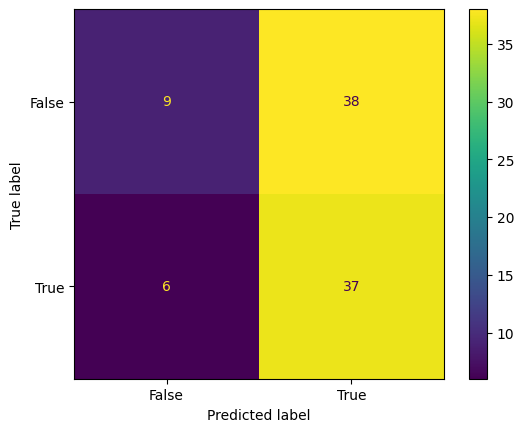

In [421]:
# confusion matrix (after regression-based binary classification)
confusion_matrix11 = metrics.confusion_matrix(y_test, pred_GPR)
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix11,
                                             display_labels = [False, True])
cm_display1.plot()
plt.show()

In [422]:
# regression-based binary classification report
print(classification_report(y_test, pred_GPR))

              precision    recall  f1-score   support

           0       0.60      0.19      0.29        47
           1       0.49      0.86      0.63        43

    accuracy                           0.51        90
   macro avg       0.55      0.53      0.46        90
weighted avg       0.55      0.51      0.45        90

